# Mejorando con Dropout

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Abril de 2025

**Versión:** 1.0  

---

## Descripción

En este notebook se explica la forma de mejorar el rendimiento usando Dropout.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)
- tensorflow (2.17.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```bash
import numpy
print(numpy.__version__)
````


# Aprendizaje y generalización

Keras también nos ayuda a entrenar redes que sean capaces de generalizar de manera muy  simple. En este laboratorio usaremos un conjunto de entrenamiento (train) y otro conjunto diferente de prueba o validación (test). La idea es que entrenaremos con uno y evaluaremos el desempeño de nuestra red en el otro.

También veremos cómo la regularización ayuda a mejorar la generalización.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [ ]:
# Carga datos de entrenamiento y prueba de CIFAR10

(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

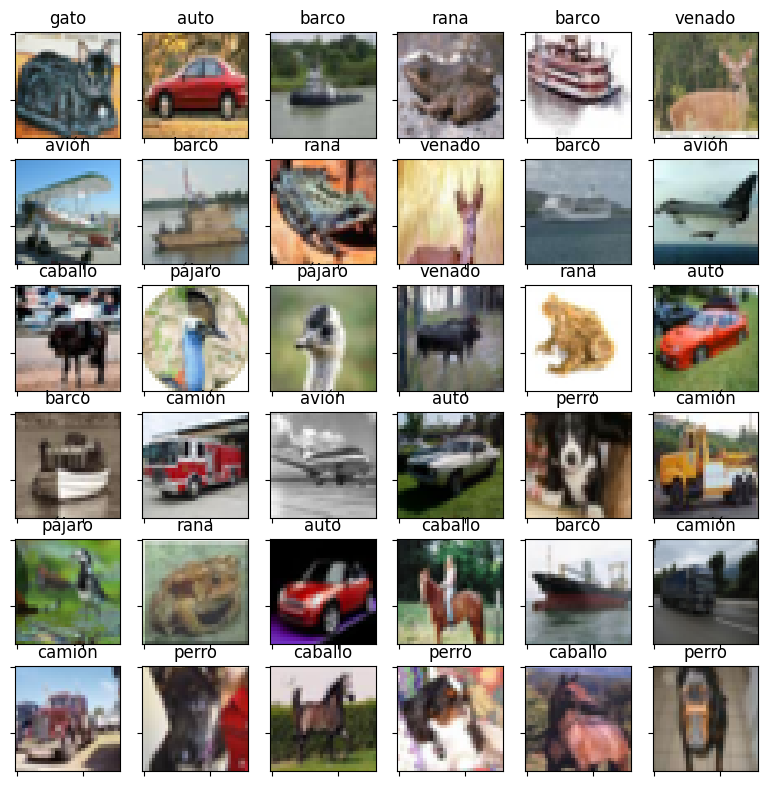

In [ ]:
# Muestra una grilla de ejemplos (al azar) del conjunto de test

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs_test))
    axs[i,j].set_title(nombres[labs_test[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs_test[ex])

In [ ]:
# Tranforma los datos para el entrenamiento,
# Es necesario transformar tanto el train como el test

X_train = imgs_train.reshape(50000,32*32*3)
X_test = imgs_test.reshape(10000,32*32*3)
X_train = X_train / 255
X_test = X_test / 255
print('X', X_train.shape, X_test.shape)

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)
print('Y', Y_train.shape, Y_test.shape)

X (50000, 3072) (10000, 3072)
Y (50000, 10) (10000, 10)


In [ ]:
# cantidad de ejemplos (train/test), neuronas de entrada y neuronas de salida

M_train = X_train.shape[0]
M_test = X_test.shape[0]

N = X_train.shape[1]
C = Y_train.shape[1]

print(N,C,M_train,M_test)

3072 10 50000 10000


In [ ]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)


# Se crea la red feed-forward (tiene 3 capas escondidas!)

h1 = 512
h2 = 256

red = keras.Sequential(name="Mi_Red")
red.add(keras.layers.Input(shape=(N,), name='entrada'))
red.add(keras.layers.Dense(h1, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(h2, activation='relu'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

Model: "Mi_Red"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,773,066 (6.76 MB)

 Trainable params: 1,773,066 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = red.fit(X_train, Y_train,
        epochs=150,
        batch_size=128,
        validation_data=(X_test,Y_test)
       )

Epoch 1/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2357 - loss: 2.1139 - val_accuracy: 0.3183 - val_loss: 1.8848
Epoch 2/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3464 - loss: 1.8415 - val_accuracy: 0.3614 - val_loss: 1.7927
Epoch 3/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3781 - loss: 1.7614 - val_accuracy: 0.3896 - val_loss: 1.7251
Epoch 4/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4016 - loss: 1.7023 - val_accuracy: 0.4079 - val_loss: 1.6754
Epoch 5/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4175 - loss: 1.6567 - val_accuracy: 0.4192 - val_loss: 1.6395
Epoch 6/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4317 - loss: 1.6189 - val_accuracy: 0.4295 - val_loss: 1.6127
Epoch 7/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4427 - loss: 1.5872 - val_accuracy: 0.4373 - val_loss: 1.5904
Epoch 8/150
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4518 - loss: 1.5598 - val_accu

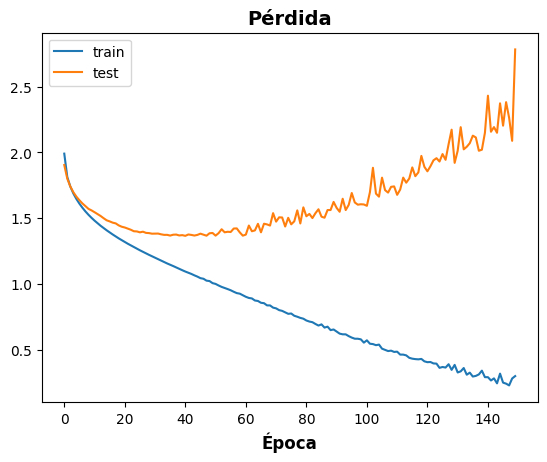

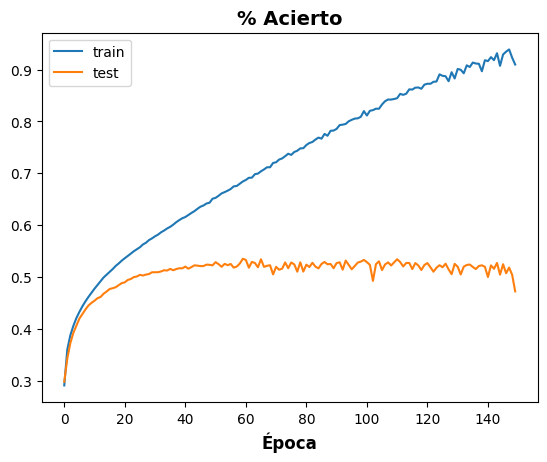

In [ ]:
# Muestra la pérdida y el acierto por cada época


# Este gráfico (el primero) muestra en el gráfico azul la función de costo (si decrementa es porque está aprendiendo) de los datos de train
# muestra en el gráfico naranjo la función de costo (si decrementa es porque está aprendiendo) de los datos de test

# Costo de train decrementa, costo de test aumenta, esto es indicio de overfitting (memorización de test)
plt.plot(hist.history['loss'], label="train")
plt.plot(hist.history['val_loss'], label="test")
plt.title('Pérdida', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=12, fontweight="bold")
plt.legend()
plt.show()

plt.plot(hist.history['accuracy'], label="train")
plt.plot(hist.history['val_accuracy'], label="test")
plt.title('% Acierto', fontsize=14, fontweight="bold")
plt.xlabel('Época', fontsize=12, fontweight="bold")
plt.legend()
plt.show()

## Ejercicio  1: Regularización por Dropout

Para agregar  Dropout en keras simplemente se debe usar la capa `keras.layers.Dropout(p)` donde `p` es la probabilidad de dropout (de apagar una  neurona). Para agregar una de  estas capas simplemente se usa `add` como cualquier otra. Por ejemplo:

```
red_reg = keras.Sequential(name="Ejemplo")
red_reg.add(keras.layers.Input(shape=(N,), name='entrada'))
red_reg.add(keras.layers.Dense(30, activation='relu'))
red_reg.add(keras.layers.Dropout(0.2))
red_reg.add(keras.layers.Dense(20, activation='relu'))
...
```

Note que se agrega una capa de dropout entre la primera y la segunda capa.

Crea una nueva red `red_reg` haciendo lo siguiente:
- Agrega una capa de dropout entre cada una de  las capas escondidas de la red usando un dropout entre 0.2 y 0.5.
- Entrena la red por 150 épocas para que veas cómo cambia el aprendizaje.
- Guarda la historia del entrenamiento en una variable `hist_reg` para luego poder graficarla junto a la historia del entrenamiento anterior.
- Imprime el historial de la pérdida y el acierto para este nuevo entrenamiento.
- Imprime el acierto del entrenamiento con y sin regularización en un mismo  gráfico.

¿Obtienes mejores resultados en cuanto al acierto?

### a)  Crea y entrena la  red

In [ ]:
# Setea los seed para números random

np.random.seed(29)
tf.random.set_seed(29)
# Escriba su código acá

### b) Imprime el historial de entrenamiento

In [ ]:
# Historial del nuevo entrenamiento
# Acá inicia su código

# Acá termina su código

### c) Compara el historial con y sin regularización

In [ ]:
# Acá empieza tu código para la comparación del acierto
# con y sin regularización

# Acá termina tu código.

### d) Muestra una grilla con ejemplos y las predicciones de la red

In [ ]:
# Acá empieza tu código para mostrar una grilla con ejemplos
# y la predicción de la red.


# Acá termina tu código.

## Ejercicio 2 (Opcional): Mejora el acierto en el test set

Usa lo que  has aprendido de regularización para intentar mejorar el acierto en el test set. Puede intentar con un dropout más agresivo, cambiando el tamaño del batch (más pequeño puede mejorar pero demora la ejecución!), aumentando la capacidad de tu red, etc.

Otro cambio  que puedes hacer es cambiar la tasa de aprendizaje.  Para eso puedes usar las funcionalidades en `keras.optimizers`.  Por ejemplo, para usar SGD con una tasa de aprendizaje de `0.001` puedes usar un código como este:

```
# primero creas la red
red = keras.Sequential()
...

# antes de compilar creas el optimizador
sgd_opt = keras.optimizers.SGD(lr=0.001)

# al compilar usas el optimizador
red.compile(
    loss='categorical_crossentropy',
    optimizer=sgd_opt,
    metrics=['accuracy']
)

# ahora puedes entrenar como siempre
red.fit(...)
...

```

Incluso puedes hacer búsqueda de hiperparámetros para encontrar la mejor red respecto del acierto en el test set. Para esto puedes programar un loop en donde vas probando la red para distintos hiperparámetros. Si lo haces ordenado y estás dispuesto a esperar, puedes encontrar redes que mejoren sustancialmente las métricas.

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

# Crear el optimizador ADAMAX
adamax_opt = keras.optimizers.Adamax(learning_rate=0.001)

# Escriba su código acá